In [1]:
# Preprocessing training and testing data

import pandas as pd
import numpy as np
import scipy

from sklearn.feature_extraction.text import TfidfTransformer
#unpack train csv
train = pd.read_csv('recipe_train.csv')

train.pop('name')
train.pop('ingredients')
train.pop('steps')

labels = train.pop('duration_label').astype(int)

In [2]:
test = pd.read_csv('recipe_test.csv')
test.pop('name')
test.pop('ingredients')
test.pop('steps')


0       ['mix flour , salt and pepper together on a sh...
1       ['with a mortar and pestle or with the bottom ...
2       ['preheat oven to 350f', 'line mini muffin cup...
3       ['in a small bowl , peel , break , and then ma...
4       ['clean chicken and pat dry', 'sprinkle salt a...
                              ...                        
9995    ['prepare green beans in microwave until tende...
9996    ['melt butter in large skillet', 'add chestnut...
9997    ['combine all ingredients and chill', 'shake w...
9998    ['put the rinsed beans into a large bowl and m...
9999    ['preheat oven to 350', 'lightly coat a 8 by 1...
Name: steps, Length: 10000, dtype: object

In [3]:
# unpacking sparse matrices


train_name = scipy.sparse.load_npz('train_name_vec.npz')
train_steps = scipy.sparse.load_npz('train_steps_vec.npz')
train_ingr = scipy.sparse.load_npz('train_ingr_vec.npz')



tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(train_name)
train_name_tfidf =  tfidf_transformer.transform(train_name)

tfidf_transformer.fit(train_steps)
train_steps_tfidf = tfidf_transformer.transform(train_steps)

tfidf_transformer.fit(train_ingr)
train_ingr_tfidf = tfidf_transformer.transform(train_ingr)

In [4]:
# For testing data
test_name = scipy.sparse.load_npz('test_name_vec.npz')
test_steps = scipy.sparse.load_npz('test_steps_vec.npz')
test_ingr = scipy.sparse.load_npz('test_ingr_vec.npz')

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(test_name)
test_name_tfidf =  tfidf_transformer.transform(test_name)

tfidf_transformer.fit(test_steps)
test_steps_tfidf = tfidf_transformer.transform(test_steps)

tfidf_transformer.fit(test_ingr)
test_ingr_tfidf = tfidf_transformer.transform(test_ingr)

In [5]:
#import doc2vec
train_name_d2v100 = pd.read_csv(r"train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
train_steps_d2v100 = pd.read_csv(r"train_steps_doc2vec100.csv", index_col = False, delimiter = ',', header = None)
train_ingr_d2v100 = pd.read_csv(r"train_ingr_doc2vec100.csv", index_col = False, delimiter = ',', header = None)

train_d2v100 = np.concatenate((train_name_d2v100.to_numpy(),
                                train, train_steps_d2v100.to_numpy(), 
                                train_ingr_d2v100.to_numpy()), axis=1)

train_name_d2v50 = pd.read_csv(r"train_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
train_steps_d2v50 = pd.read_csv(r"train_steps_doc2vec50.csv", index_col = False, delimiter = ',', header = None)
train_ingr_d2v50 = pd.read_csv(r"train_ingr_doc2vec50.csv", index_col = False, delimiter = ',', header = None)

train_d2v50 = np.concatenate((train_name_d2v50.to_numpy(),
                                train, train_steps_d2v50.to_numpy(), 
                                train_ingr_d2v50.to_numpy()), axis=1)
print(train_d2v100.shape)
print(train_d2v50.shape)

(40000, 302)
(40000, 152)


In [6]:
#fitting feature selection for k = 50, k = 100
from sklearn.feature_selection import SelectKBest, chi2
best_names = SelectKBest(score_func=chi2, k=50).fit(train_name, labels)
train_name_filtered50 = best_names.transform(train_name)
    
best_steps = SelectKBest(score_func=chi2, k=50).fit(train_steps, labels)
train_steps_filtered50 = best_steps.transform(train_steps)

best_ingr = SelectKBest(score_func=chi2, k = 50).fit(train_ingr, labels)
train_ingr_filtered50 = best_ingr.transform(train_ingr)

train_filtered50 = np.concatenate((train_name_filtered50.toarray(),
                                 train, train_steps_filtered50.toarray(), 
                                train_ingr_filtered50.toarray()), axis=1)
    


best_names = SelectKBest(score_func=chi2, k=100).fit(train_name, labels)
train_name_filtered100 = best_names.transform(train_name)
    
best_steps = SelectKBest(score_func=chi2, k=100).fit(train_steps, labels)
train_steps_filtered100 = best_steps.transform(train_steps)

best_ingr = SelectKBest(score_func=chi2, k =100).fit(train_ingr, labels)
train_ingr_filtered100 = best_ingr.transform(train_ingr)

train_filtered100 = np.concatenate((train_name_filtered100.toarray(),
                                 train, train_steps_filtered100.toarray(), 
                                train_ingr_filtered100.toarray()), axis=1)
print(train_filtered50.shape)
print(train_filtered100.shape)

(40000, 152)
(40000, 302)


In [7]:
#performing TruncatedSVD on the sparse bag of words matrix
from sklearn.decomposition import TruncatedSVD
svd50 = TruncatedSVD(n_components = 50, n_iter = 5, random_state = 200)
svd100 = TruncatedSVD(n_components = 100, n_iter = 5, random_state = 200)

train_name_svd50 = svd50.fit_transform(train_name, labels)
train_steps_svd50 = svd50.fit_transform(train_steps, labels)
train_ingr_svd50 = svd50.fit_transform(train_ingr, labels)
train_svd50 = np.concatenate((train_name_svd50,
                            train, train_steps_svd50, 
                            train_ingr_svd50), axis=1)

train_name_svd100 = svd100.fit_transform(train_name, labels)
train_steps_svd100 = svd100.fit_transform(train_steps, labels)
train_ingr_svd100 = svd100.fit_transform(train_ingr, labels)
train_svd100 = np.concatenate((train_name_svd100,
                            train, train_steps_svd100, 
                            train_ingr_svd100), axis=1)
print(train_svd100.shape)
print(train_svd50.shape)

(40000, 302)
(40000, 152)


In [8]:
#feature selection with TF_IDF encoding on bag of words sparse matrix and k = 50, 100
from sklearn.feature_selection import SelectKBest, chi2

best_names = SelectKBest(score_func=chi2, k=50).fit(train_name_tfidf, labels)
train_name_filtered50_tfidf = best_names.transform(train_name_tfidf)
    
best_steps = SelectKBest(score_func=chi2, k=50).fit(train_steps_tfidf, labels)
train_steps_filtered50_tfidf = best_steps.transform(train_steps_tfidf)

best_ingr = SelectKBest(score_func=chi2, k = 50).fit(train_ingr_tfidf, labels)
train_ingr_filtered50_tfidf = best_ingr.transform(train_ingr_tfidf)

train_filtered50_tfidf = np.concatenate((train_name_filtered50_tfidf.toarray(),
                                 train, train_steps_filtered50_tfidf.toarray(), 
                                train_ingr_filtered50_tfidf.toarray()), axis=1)
    

best_names = SelectKBest(score_func=chi2, k=100).fit(train_name_tfidf, labels)
train_name_filtered100_tfidf = best_names.transform(train_name_tfidf)
    
best_steps = SelectKBest(score_func=chi2, k=100).fit(train_steps_tfidf, labels)
train_steps_filtered100_tfidf = best_steps.transform(train_steps_tfidf)

best_ingr = SelectKBest(score_func=chi2, k = 100).fit(train_ingr_tfidf, labels)
train_ingr_filtered100_tfidf = best_ingr.transform(train_ingr_tfidf)

train_filtered100_tfidf = np.concatenate((train_name_filtered100_tfidf.toarray(),
                                 train, train_steps_filtered100_tfidf.toarray(), 
                                train_ingr_filtered100_tfidf.toarray()), axis=1)
print(train_filtered100_tfidf.shape)
print(train_filtered50_tfidf.shape)

(40000, 302)
(40000, 152)


In [9]:
# determine most efficient scoring function for feature selection

from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import mord
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ordinal_reg = mord.LogisticIT()
knn  = KNeighborsClassifier(weights='distance')

scores_by_k = []
training_data = [train_d2v50, train_d2v100, train_filtered50, train_filtered100, 
                train_filtered50_tfidf, train_filtered100_tfidf, train_svd50, train_svd100]
training_score = []
for train_set in training_data:
    score = []   
    train_set = preprocessing.StandardScaler().fit(train_set).transform(train_set)
    X_train, X_test, y_train, y_test = train_test_split(train_set, labels, test_size = 0.2, random_state = 200)
    knn.fit(X_train, y_train)
    ordinal_reg.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    score.append(ordinal_reg.score(X_test, y_test))
    training_score.append([score])

print(training_score)


[[[0.618875, 0.705875]], [[0.535125, 0.705375]], [[0.71525, 0.775125]], [[0.686625, 0.78425]], [[0.728125, 0.773375]], [[0.714625, 0.782]], [[0.6655, 0.74025]], [[0.621375, 0.760125]]]


In [10]:
values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
# find ideal number of features for knn
knn_score = []
ordinal_reg_score = []
for i in values:
    best_names = SelectKBest(score_func=chi2, k=i).fit(train_name_tfidf, labels)
    train_name_filtered = best_names.transform(train_name_tfidf)
    
    best_steps = SelectKBest(score_func=chi2, k=i).fit(train_steps_tfidf, labels)
    train_steps_filtered = best_steps.transform(train_steps_tfidf)

    best_ingr = SelectKBest(score_func=chi2, k=i).fit(train_ingr_tfidf, labels)
    train_ingr_filtered = best_ingr.transform(train_ingr_tfidf)
    train_filtered = np.concatenate((train_name_filtered.toarray(),
                                     train, train_steps_filtered.toarray(), 
                                    train_ingr_filtered.toarray()), axis=1)
    
    best_features = SelectKBest(score_func=chi2, k = i).fit(train_filtered, labels)
    train_filtered = best_features.transform(train_filtered)
    train_filtered = preprocessing.StandardScaler().fit(train_filtered).transform(train_filtered)
    X_train, X_test, y_train, y_test = train_test_split(train_filtered, labels, test_size = 0.2, random_state = 200)
    knn.fit(X_train, y_train)
    knn_score.append(knn.score(X_test, y_test))
print(knn_score)
    

[0.626375, 0.67775, 0.733625, 0.7435, 0.725125, 0.717375, 0.70975, 0.704375, 0.707375, 0.699875]


In [11]:
values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
# find ideal number of features for ordinal regression
ordinal_reg_score0 = []
for i in values:
    best_names = SelectKBest(score_func=chi2, k=i).fit(train_name, labels)
    train_name_filtered = best_names.transform(train_name)
    
    best_steps = SelectKBest(score_func=chi2, k=i).fit(train_steps, labels)
    train_steps_filtered = best_steps.transform(train_steps)

    best_ingr = SelectKBest(score_func=chi2, k=i).fit(train_ingr, labels)
    train_ingr_filtered = best_ingr.transform(train_ingr)
    train_filtered = np.concatenate((train_name_filtered.toarray(),
                                     train, train_steps_filtered.toarray(), 
                                    train_ingr_filtered.toarray()), axis=1)
    
    best_features = SelectKBest(score_func=chi2, k = i).fit(train_filtered, labels)
    train_filtered = best_features.transform(train_filtered)
    train_filtered = preprocessing.StandardScaler().fit(train_filtered).transform(train_filtered)
    X_train, X_test, y_train, y_test = train_test_split(train_filtered, labels, test_size = 0.2, random_state = 200)
    ordinal_reg.fit(X_train, y_train)
    ordinal_reg_score0.append(ordinal_reg.score(X_test, y_test))
print(ordinal_reg_score0)
    

[0.70625, 0.7265, 0.769625, 0.77225, 0.776875, 0.782125, 0.780375, 0.78125, 0.78075, 0.78425]


Text(0, 0.5, 'Accuracy')

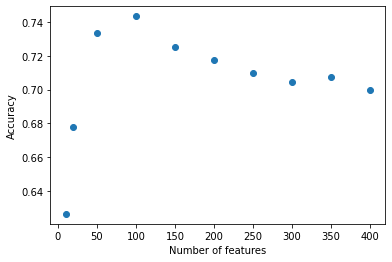

In [12]:
# accuracy plot for kNN
values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
plt.scatter(values, knn_score)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

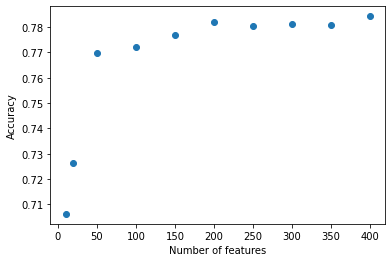

In [13]:
#accuracy plot for ordinal regression
values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
plt.scatter(values, ordinal_reg_score0)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

In [14]:
values1 = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
# further feature selection for ordinal regression
ordinal_reg_score = []
for i in values1:
    best_names = SelectKBest(score_func=chi2, k=i).fit(train_name, labels)
    train_name_filtered = best_names.transform(train_name)
    
    best_steps = SelectKBest(score_func=chi2, k=i).fit(train_steps, labels)
    train_steps_filtered = best_steps.transform(train_steps)

    best_ingr = SelectKBest(score_func=chi2, k=i).fit(train_ingr, labels)
    train_ingr_filtered = best_ingr.transform(train_ingr)
    train_filtered = np.concatenate((train_name_filtered.toarray(),
                                     train, train_steps_filtered.toarray(), 
                                    train_ingr_filtered.toarray()), axis=1)
    
    best_features = SelectKBest(score_func=chi2, k = i).fit(train_filtered, labels)
    
    train_filtered = best_features.transform(train_filtered)
    train_filtered = preprocessing.StandardScaler().fit(train_filtered).transform(train_filtered)
    X_train, X_test, y_train, y_test = train_test_split(train_filtered, labels, test_size = 0.2, random_state = 200)
    
    ordinal_reg_score.append(ordinal_reg.fit(X_train, y_train).score(X_test, y_test))
print(ordinal_reg_score)
    

[0.77225, 0.776875, 0.782125, 0.780375, 0.78125, 0.78075, 0.78425, 0.783375, 0.785125, 0.7865, 0.785125]


Text(0, 0.5, 'Accuracy')

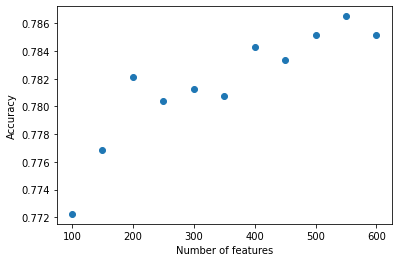

In [89]:
#additional accuracy plot for regression
values1 = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
plt.scatter(values1, ordinal_reg_score)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

In [109]:
# building final set of features, transforming test features for Kaggle
kvals = [i for i in range(5, 15)]
best_names = SelectKBest(score_func=chi2, k=100).fit(train_name_tfidf, labels)
train_name_filtered = best_names.transform(train_name_tfidf)
test_name_filtered = best_names.transform(test_name_tfidf) 

best_steps = SelectKBest(score_func=chi2, k=100).fit(train_steps_tfidf, labels)
train_steps_filtered = best_steps.transform(train_steps_tfidf)
test_steps_filtered = best_steps.transform(test_steps_tfidf)

best_ingr = SelectKBest(score_func=chi2, k=100).fit(train_ingr_tfidf, labels)
train_ingr_filtered = best_ingr.transform(train_ingr_tfidf)
test_ingr_filtered = best_ingr.transform(test_ingr_tfidf)

train_filtered = np.concatenate((train_name_filtered.toarray(),
                                train, train_steps_filtered.toarray(), 
                                train_ingr_filtered.toarray()), axis=1)

best_features = SelectKBest(score_func=chi2, k=100).fit(train_filtered, labels)
train_filtered = best_features.transform(train_filtered)
train_filtered = preprocessing.StandardScaler().fit(train_filtered).transform(train_filtered)



In [ ]:
#tuning the n_neighbors hyperparameter
X_train, X_test, y_train, y_test = train_test_split(train_filtered, labels, test_size = 0.2, random_state = 200)

knn_kval_score = []
for i in kvals:
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(X_train, y_train)
    knn_kval_score.append(knn.score(X_test, y_test))
print(knn_kval_score)

Text(0, 0.5, 'Accuracy')

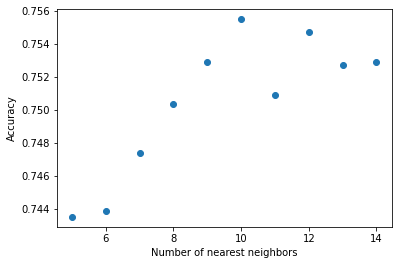

In [91]:
#accuracy plot against hyperparameter value for kNN
plt.scatter(kvals, knn_kval_score)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')

In [96]:
#ordinal k-NN implementation and error analysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
train_knr = train_filtered
knr = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
X_train, X_test, y_train, y_test = train_test_split(train_knr, labels, test_size = 0.2, random_state = 200)

knr.fit(X_train, y_train)
predictions = knr.predict(X_test)

for i in range(0, len(predictions)):
    if predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else:
        predictions[i] = 2

ord_knn = accuracy_score(y_test.astype(int), predictions)
ord_knn_precision = precision_score(y_test.astype(int), predictions, average = 'micro')
ord_knn_recall = recall_score(y_test.astype(int), predictions, average = 'micro')
knn_confusion = confusion_matrix(y_test.astype(int), predictions)
print('Accuracy:', ord_knn)
print('Precision:', ord_knn_precision)
print('Recall:', ord_knn_recall)
print(knn_confusion)


Accuracy: 0.752375
Precision: 0.752375
Recall: 0.752375
[[2797  697    6]
 [1061 3050    9]
 [  55  153  172]]


In [113]:
# fitting the model onto test data and output predictions
test_knr = np.concatenate((test_name_filtered.toarray(),
                                test, test_steps_filtered.toarray(), 
                                test_ingr_filtered.toarray()), axis=1)

test_knr = best_features.transform(test_knr)
test_knr = preprocessing.StandardScaler().fit(test_knr).transform(test_knr)

knr.fit(train_knr, labels)
predictions = knr.predict(test_knr)
for i in range(0, len(predictions)):
    if predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else:
        predictions[i] = 2
predictions = pd.DataFrame(predictions, columns =  ['duration_label'])
predictions.index +=1
predictions.to_csv('knn_labels.csv', index_label = 'id')
                

In [117]:
# building final feature set for Ordinal Logistic Regression and fit on test data
ordinal_reg = mord.LogisticIT()
best_names = SelectKBest(score_func=chi2, k=400).fit(train_name, labels)
train_name_filtered = best_names.transform(train_name)
test_name_filtered = best_names.transform(test_name)
    
best_steps = SelectKBest(score_func=chi2, k=400).fit(train_steps, labels)
train_steps_filtered = best_steps.transform(train_steps)
test_steps_filtered = best_steps.transform(test_steps)

best_ingr = SelectKBest(score_func=chi2, k=400).fit(train_ingr, labels)
train_ingr_filtered = best_ingr.transform(train_ingr)
test_ingr_filtered = best_ingr.transform(test_ingr)

train_filtered = np.concatenate((train_name_filtered.toarray(),
                                train, train_steps_filtered.toarray(), 
                                train_ingr_filtered.toarray()), axis=1)

test_filtered = np.concatenate((test_name_filtered.toarray(),
                                test, test_steps_filtered.toarray(), 
                                test_ingr_filtered.toarray()), axis=1)
    
best_features = SelectKBest(score_func=chi2, k = 400).fit(train_filtered, labels)
train_filtered = best_features.transform(train_filtered)
test_filtered = best_features.transform(test_filtered)

train_filtered = preprocessing.StandardScaler().fit(train_filtered).transform(train_filtered)
test_filtered = preprocessing.StandardScaler().fit(test_filtered).transform(test_filtered)

train_ord = train_filtered
test_ord = test_filtered

In [ ]:
#tuning the regularization hyperparameter
X_train, X_test, y_train, y_test = train_test_split(train_ord, labels, test_size = 0.2, random_state = 200)


alpha_values = [i/5 for i in range(0, 6)]
alpha_score = []
for i in alpha_values:
    ordinal_reg = mord.LogisticIT(alpha = i)
    alpha_score.append(ordinal_reg.fit(X_train, y_train).score(X_test, y_test))
print(alpha_score)

Text(0, 0.5, 'Accuracy score')

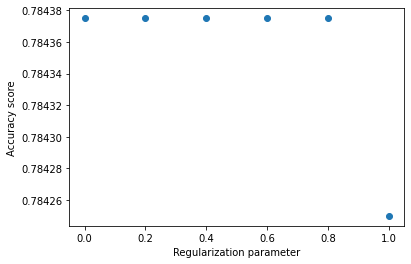

In [69]:
#accuracy against hyperparameter value plot for Ordinal Logistic Regression
plt.scatter(alpha_values, alpha_score)
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy score')

In [116]:
# Final Ordinal Logistic Regression model error analysis
X_train, X_test, y_train, y_test = train_test_split(train_ord, labels, test_size = 0.2, random_state = 200)

ordinal_reg = mord.LogisticIT(alpha = 0.8)

ordinal_reg.fit(X_train, y_train)
predictions1 = ordinal_reg.predict(X_test)



ord_lr = accuracy_score(y_test, predictions1)
ord_lr_precision = precision_score(y_test, predictions1, average = 'micro')
ord_lr_recall = recall_score(y_test, predictions1, average = 'micro')
ord_lr_confusion = confusion_matrix(y_test, predictions1)
print('Accuracy:', ord_lr)
print('Precision:', ord_lr_precision)
print('Recall:', ord_lr_recall)
print(ord_lr_confusion)


Accuracy: 0.784375
Precision: 0.784375
Recall: 0.784375
[[2832  658   10]
 [ 808 3246   66]
 [  31  152  197]]


In [119]:
#fitting the model onto test data and output predictions
ordinal_reg.fit(train_ord, labels)
reg_pred = ordinal_reg.predict(test_ord)
reg_pred = pd.DataFrame(reg_pred, columns =  ['duration_label'])
reg_pred.index +=1
reg_pred.to_csv('reg_labels.csv', index_label = 'id')